In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/JoseVillagranE/Pointer-Networks.git

Cloning into 'Pointer-Networks'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 215 (delta 120), reused 174 (delta 79), pack-reused 0
Receiving objects: 100% (215/215), 4.40 MiB | 18.56 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [3]:
cd Pointer-Networks/

/content/Pointer-Networks


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from dataset import CHDataset
from convex_hull import training, eval_one_example, eval_model, PlotLossCurve
from pointer_network import PointerNet, PointerNetLoss
from TSPDataset import TSPDataset

In [ ]:
train_filename="./data/convex_hull_50_train.txt" 
val_filename = "./data/convex_hull_50_test.txt"

max_in_seq_len=50
max_out_seq_len=11
num_layers = 1
rnn_hidden_size = 32

model = PointerNet("LSTM", True, num_layers, 2, rnn_hidden_size, 0.0)

train_ds = CHDataset(train_filename, max_in_seq_len, max_out_seq_len, 2e4)
eval_ds = CHDataset(val_filename, max_in_seq_len, max_out_seq_len, 1e3)

print("Train data size: {}".format(len(train_ds)))
print("Eval data size: {}".format(len(eval_ds)))

Train data size: 20000
Eval data size: 1000


In [ ]:
cudaAvailable = torch.cuda.is_available()
print(cudaAvailable)

True


In [ ]:
TrainingLoss, EvalLoss = training(model, train_ds, eval_ds, cudaAvailable, nepoch=30, freqEval=5)

D:\matricula u chile 2015\12 semestre\Trabajo_dirigido\Diego\codigo\PointerNetwork\convex_hull.py:179: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm(model.parameters(), clip_norm)


Epoch : 0, loss 1.2182404302954675
Epoch: 0, Eval Loss 0.847038919955492
Epoch : 1, loss 0.7536873981356621
Epoch : 2, loss 0.6485088189959526
Epoch : 3, loss 0.5945986782364547
Epoch : 4, loss 0.562306798107177
Epoch : 5, loss 0.5397270621664823
Epoch: 5, Eval Loss 0.5331619176417589
Epoch : 6, loss 0.5234544403932989
Epoch : 7, loss 0.5105805751189589
Epoch : 8, loss 0.49935362021774055
Epoch : 9, loss 0.4892207261778414
Epoch : 10, loss 0.4808284835468978
Epoch: 10, Eval Loss 0.48039661985635757
Epoch : 11, loss 0.4738201278757304
Epoch : 12, loss 0.46737350049242377
Epoch : 13, loss 0.4614636353302747
Epoch : 14, loss 0.45638306415714325
Epoch : 15, loss 0.45159429302960635
Epoch: 15, Eval Loss 0.4519965361952782
Epoch : 16, loss 0.4470672408375889
Epoch : 17, loss 0.4431911987382919
Epoch : 18, loss 0.43981190046072005
Epoch : 19, loss 0.4368873704716563
Epoch : 20, loss 0.4341901934798807
Epoch: 20, Eval Loss 0.4359943869113922
Epoch : 21, loss 0.43176953313201666
Epoch : 22, los

In [ ]:
hours, rem = divmod(14564.804045, 3600)
minutes, seconds = divmod(rem, 60)

print("Training of Pointer Networks takes: {:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

Training of Pointer Networks takes: 04:02:44.80


In [ ]:
model.load_state_dict(torch.load("PointerModel.pt"))

<All keys matched successfully>

In [ ]:
eval_model(model, train_ds, cudaAvailable)

The Accuracy of the model is: 0.42635


In [ ]:
eval_model(model, eval_ds, cudaAvailable)

The Accuracy of the model is: 0.421


In [ ]:
example = train_ds.__getitem__(0)
print(example[0].shape)

(51, 2)


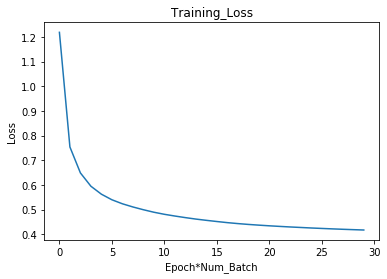

In [ ]:
PlotLossCurve(TrainingLoss, "Training_Loss", shape = (10, 10))

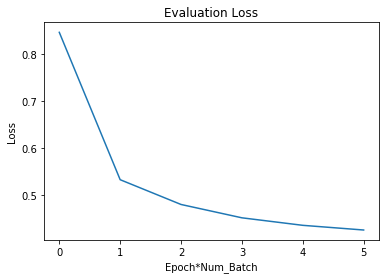

In [ ]:
PlotLossCurve(EvalLoss, "Evaluation Loss", shape=(10, 10))

### TSP Supervised

In [17]:
seq_len = 5
num_layers = 1
encoder_input_size = 2 
rnn_hidden_size = 32
save_model_name = "PointerModel_Sup_5_th.pt"
batch_size = 128
bidirectional = True
rnn_type = "LSTM"
embedding_dim = encoder_input_size # Supervised learning not working w/ embeddings
attn_type = "Sup"
C = None
training_type = "Sup"
nepoch = 20
lr = 1e-2
Teaching_Forcing = 0.0
freqEval = 2


In [7]:
train_filename="../drive/My Drive/CH_TSP_data/tsp5.txt" 
val_filename = "../drive/My Drive/CH_TSP_data/tsp5_test.txt"
cudaAvailable = torch.cuda.is_available()

train_ds = TSPDataset(train_filename, seq_len, training_type, lineCountLimit=-1)
eval_ds = TSPDataset(val_filename, seq_len, training_type, lineCountLimit=-1)
    
print("Train data size: {}".format(len(train_ds)))
print("Eval data size: {}".format(len(eval_ds)))

Train data size: 1000000
Eval data size: 10000


In [8]:
!pip install tensorboardX

     |████████████████████████████████| 317kB 3.4MB/s 


In [18]:
from TSP import weights_init
model = PointerNet(rnn_type, bidirectional, num_layers, embedding_dim, rnn_hidden_size, 0, batch_size, attn_type=attn_type, C=C)
weights_init(model)

In [19]:
from TSP import training
TrainingLoss, EvalLoss, Valid_Tours, Valid_Tours_Eval = training(model, train_ds, eval_ds, cudaAvailable, nepoch=nepoch, 
                                       model_file=save_model_name, batchSize=batch_size, lr=lr,
                                       freqEval=freqEval, Teaching_Forcing=Teaching_Forcing)

Epoch : 0 || loss : 0.708 || Valid Tours : 0.269
Epoch : 1 || loss : 0.563 || Valid Tours : 0.540
Epoch : 2 || loss : 0.546 || Valid Tours : 0.613
Epoch: 2 || Eval Loss : 0.535 || Eval Valid Tours : 0.664
Epoch : 3 || loss : 0.538 || Valid Tours : 0.645
Epoch : 4 || loss : 0.533 || Valid Tours : 0.664
Epoch: 4 || Eval Loss : 0.526 || Eval Valid Tours : 0.703
Epoch : 5 || loss : 0.529 || Valid Tours : 0.678
Epoch : 6 || loss : 0.526 || Valid Tours : 0.686
Epoch: 6 || Eval Loss : 0.524 || Eval Valid Tours : 0.711
Epoch : 7 || loss : 0.525 || Valid Tours : 0.690
Epoch : 8 || loss : 0.522 || Valid Tours : 0.698
Epoch: 8 || Eval Loss : 0.522 || Eval Valid Tours : 0.716
Epoch : 9 || loss : 0.521 || Valid Tours : 0.703
Epoch : 10 || loss : 0.520 || Valid Tours : 0.706
Epoch: 10 || Eval Loss : 0.520 || Eval Valid Tours : 0.725
Epoch : 11 || loss : 0.519 || Valid Tours : 0.709
Epoch : 12 || loss : 0.518 || Valid Tours : 0.712
Epoch: 12 || Eval Loss : 0.519 || Eval Valid Tours : 0.724
Epoch : 13

The Accuracy of the model is: 0.4885
Number of Invalid Tours: 2472
Total Number of Tours: 10000
Avg Tour Length: 2.748


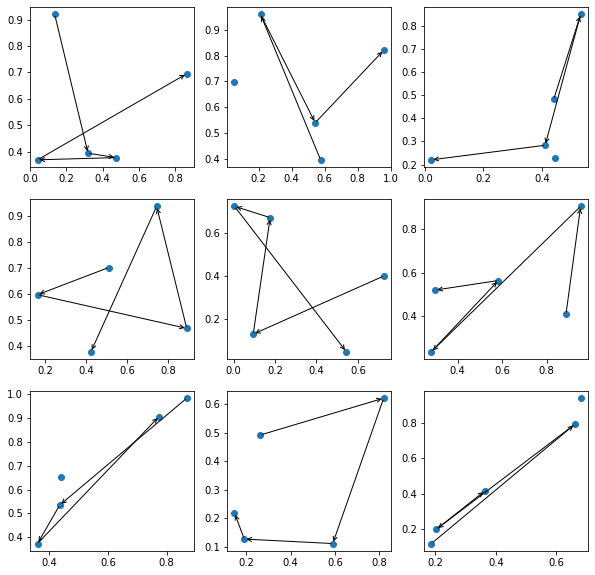

In [37]:
from TSP import eval_model
eval_model(model, eval_ds, cudaAvailable, n_plt_tours=9, n_cols=3)

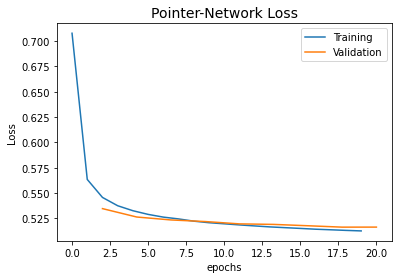

In [34]:
import numpy as np
plt.plot(range(len(TrainingLoss)), TrainingLoss, label="Training")
EvalLoss_x = np.linspace(2, 20, num=len(EvalLoss))
plt.plot(EvalLoss_x, EvalLoss, label="Validation")
plt.legend()
plt.xlabel("epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Pointer-Network Loss", fontsize=14)
plt.show()

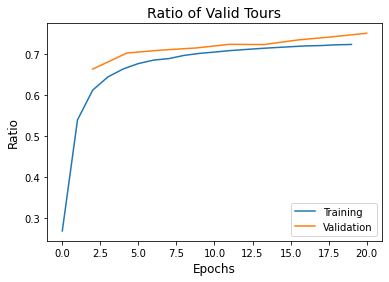

In [36]:
plt.plot(range(len(Valid_Tours)), Valid_Tours, label="Training")
Valid_Tours_Eval_x = np.linspace(2, 20, num=len(Valid_Tours_Eval))
plt.plot(Valid_Tours_Eval_x, Valid_Tours_Eval, label="Validation")
plt.legend()
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.title("Ratio of Valid Tours", fontsize=14)
plt.show()

## RL training

In [ ]:
from RLtraining import NeuronalOptm

In [ ]:
seq_len = 20
num_layers = 1 # Se procesa con sola una celula por coordenada. 
input_lenght = 2 
rnn_hidden_size = 128
rnn_type = 'LSTM'
bidirectional = False
hidden_dim_critic = rnn_hidden_size
process_block_iter = 3
inp_len_seq = seq_len
lr = 1e-3
C = 1
batch_size = 128
n_epoch = 50
embedding_dim = 128 #d-dimensional embedding dim
embedding_dim_critic = embedding_dim

save_model_file="RLPointerModel_TSP20.pt"

In [ ]:
train_filename="./CH_TSP_data/tsp_all_len20.txt" 
val_filename = "./CH_TSP_data/tsp_20_test.txt"

train_ds = TSPDataset(train_filename, seq_len, lineCountLimit=-1)
eval_ds = TSPDataset(val_filename, seq_len, lineCountLimit=-1)
    
print("Train data size: {}".format(len(train_ds)))
print("Eval data size: {}".format(len(eval_ds)))

Train data size: 100000
Eval data size: 10000


In [ ]:
trainer = NeuronalOptm(input_lenght, rnn_type, bidirectional, num_layers, rnn_hidden_size, 
                           embedding_dim, hidden_dim_critic, process_block_iter, inp_len_seq, lr, 
                           C=C, batch_size=batch_size)

In [ ]:
Actor_Training_Loss, Critic_Training_Loss, Tour_training_mean = trainer.training(train_ds, eval_ds,
                                                                                     save_model_file=save_model_file,
                                                                                     nepoch=n_epoch)

KeyboardInterrupt: 